In [2]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import os

In [3]:
csv_list = []

for csv in os.listdir('../../Artificial_data/DOGEx_v1/csv/'):
    if csv[0] == '.':
        continue 
            
    csv_list.append(csv)

In [4]:
scaler = MinMaxScaler()

with open('../r_clf_v1_un.sav', 'rb') as f:
    clf = pickle.load(f)
    
meta = pd.read_csv('../../Artificial_data/DOGEx_v1/synthetic-meta.txt', sep=',', header=None)
meta.columns = ['station', 'direction', 'date']
z_meta = meta[meta.direction == 'Z']

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/nikilshyamsunder/miniforge3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/nikilshyamsunder/miniforge3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/nikilshyamsunder/miniforge3/lib/python3.8/site-packages/sklearn/base.py:329: U

In [7]:
df = pd.read_csv('../../Artificial_data/DOGEx_v1/csv/ajgj.csv', header=None)

df.columns = ['date', 'un', 'ue', 'uz', 'sn', 'se', 'sz']
df.drop(['sn', 'se', 'sz'], axis=1, inplace=True)
df = df[['date','uz']]

In [8]:
df

,date,uz
0,1992.4901,0.007827
1,1992.4956,-0.009830
2,1992.5010,-0.000364
3,1992.5038,0.006226
4,1992.5065,0.009022
...,...,...
5287,2008.9802,0.006077
5288,2008.9829,0.013030
5289,2008.9856,0.007390
5290,2008.9884,0.007888


In [4]:
def process_csv(station):
    df = pd.read_csv('../../Artificial_data/DOGEx_v1/' + station, header=None)

    df.columns = ['date', 'un', 'ue', 'uz', 'sn', 'se', 'sz']
    df.drop(['sn', 'se', 'sz'], axis=1, inplace=True)
    df = df[['date','uz']]

    offset_dates = z_meta[z_meta.station==station.split('/')[1][0:4]]['date']
    
    df_scaled = scaler.fit_transform(df['uz'].to_numpy().reshape(-1, 1))   
    df['uz'] = df_scaled
    
    return df, offset_dates

bhqc.csv
oppx.csv
wgjm.csv
nhrl.csv
tfrt.csv
grwi.csv
dqbp.csv
lpod.csv
awtu.csv
ursc.csv
saml.csv
tyix.csv
mquv.csv
hkzr.csv
tutx.csv
gmez.csv
riak.csv
oiau.csv
zchm.csv
kmkt.csv
rtuc.csv


/var/folders/lv/0w01hdjd20g_v4q9k2bpnpgm0000gn/T/ipykernel_18708/2682501831.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(12, 6))


ajgj.csv
ywrz.csv
aler.csv
ujpa.csv
rjgv.csv
gpri.csv
qvpb.csv
nszm.csv
pngd.csv
xhlt.csv
oqqp.csv
gmgi.csv
uhps.csv
rcjx.csv
aywy.csv
dcpf.csv
bxvg.csv
qium.csv
tnjs.csv
gamp.csv
awmi.csv
zoyu.csv
azsc.csv
wych.csv
xzbc.csv


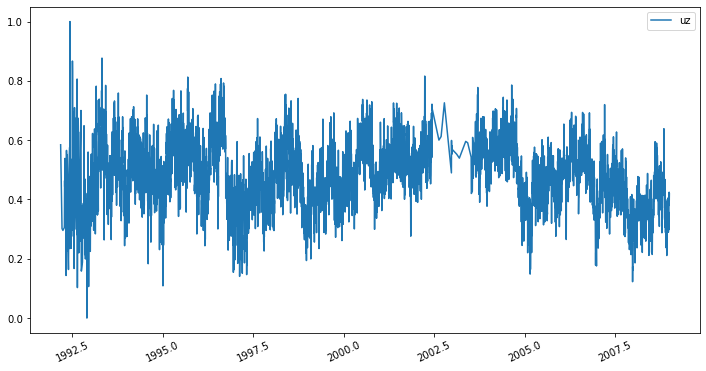

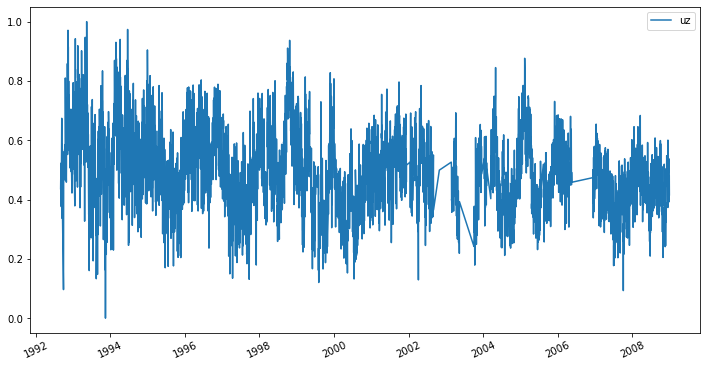

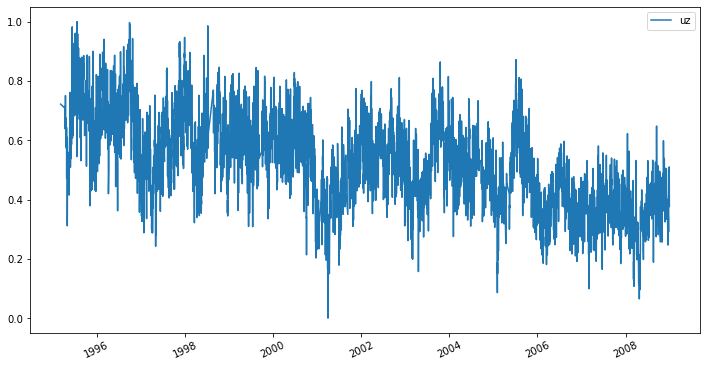

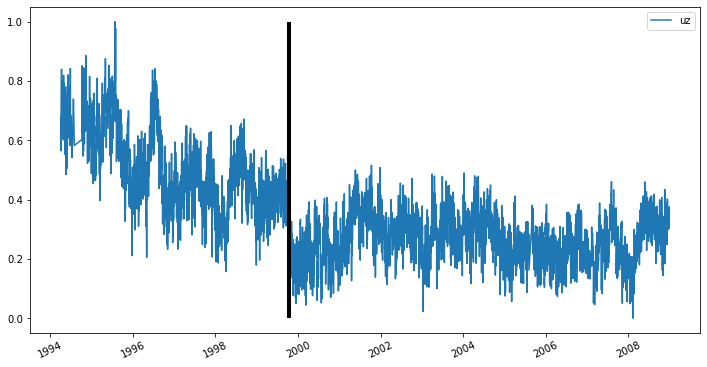

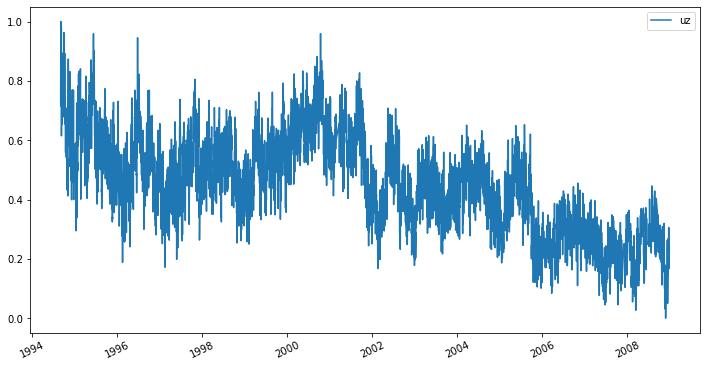

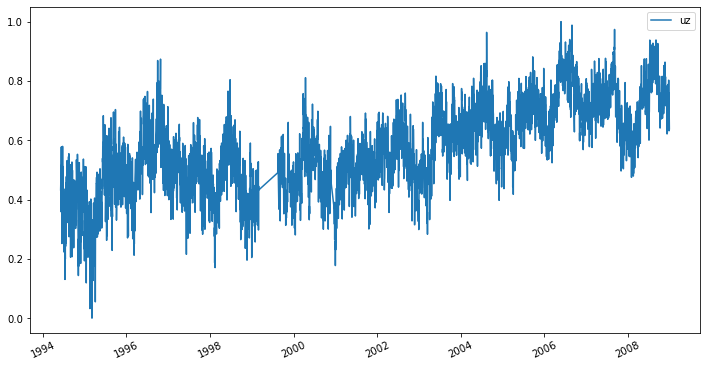

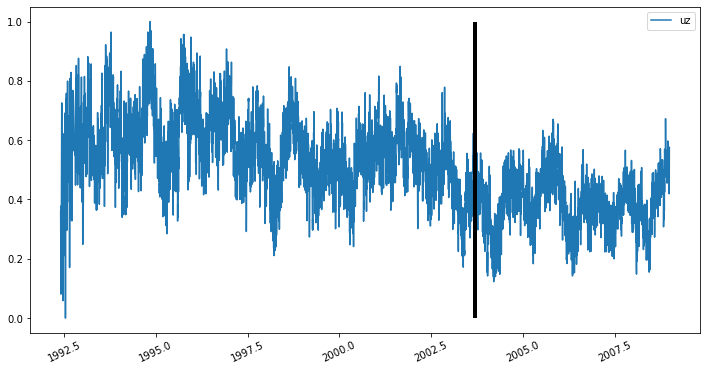

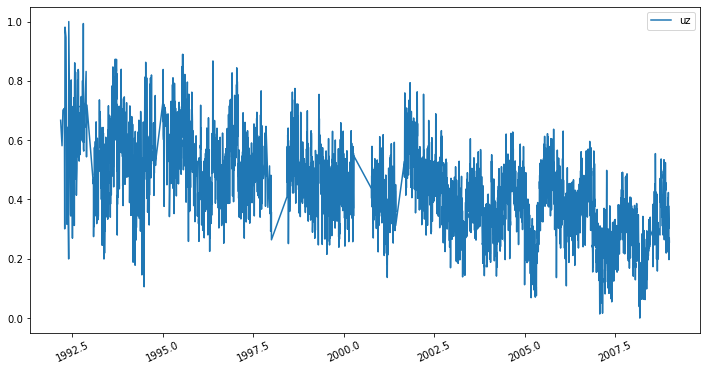

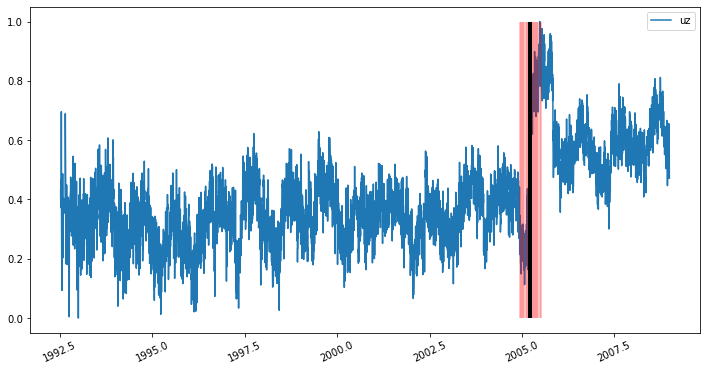

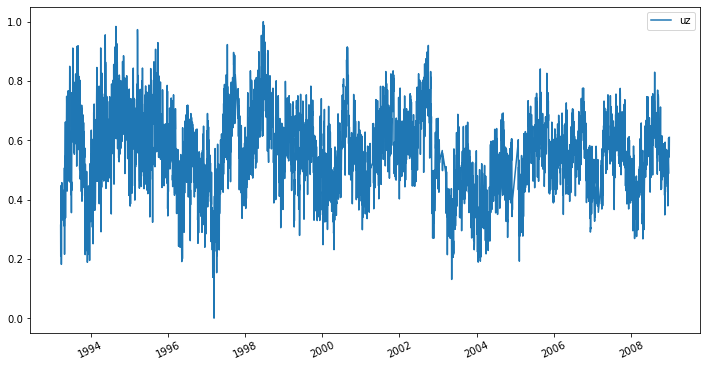

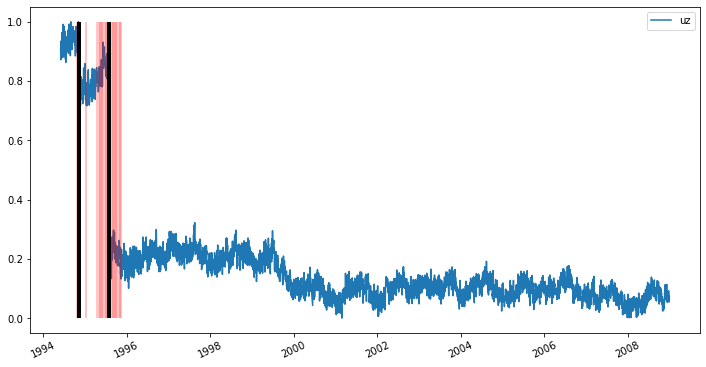

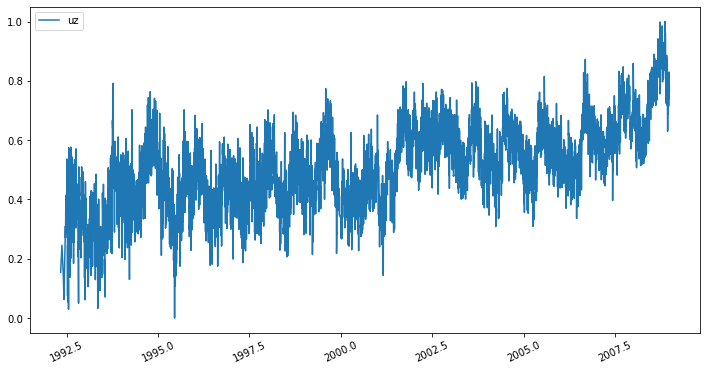

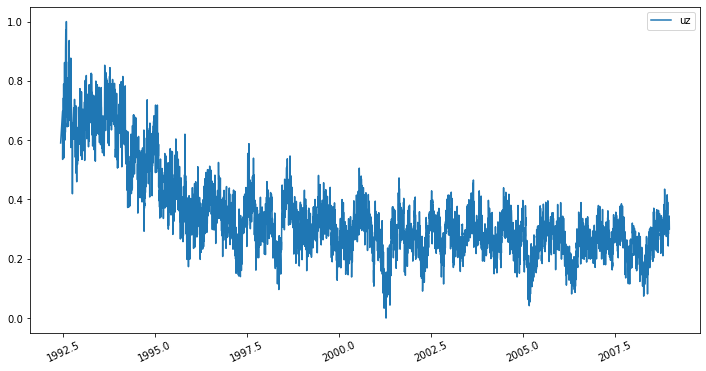

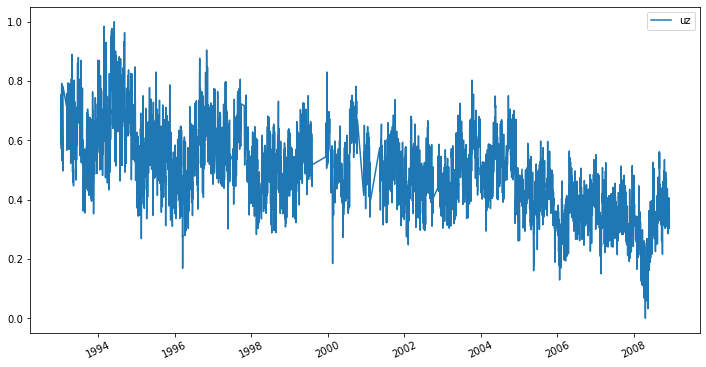

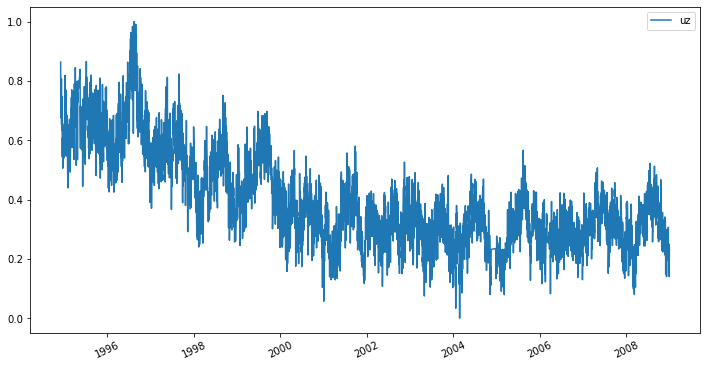

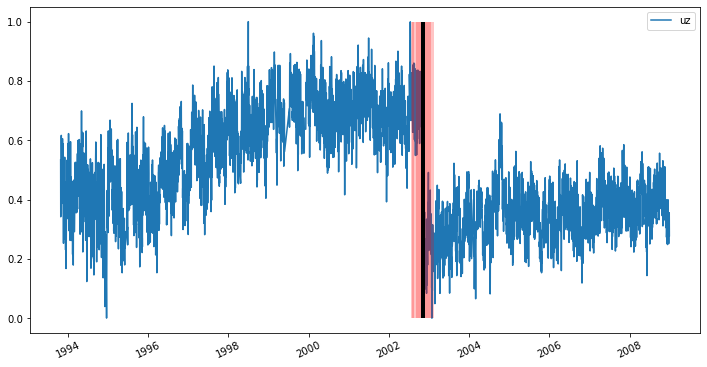

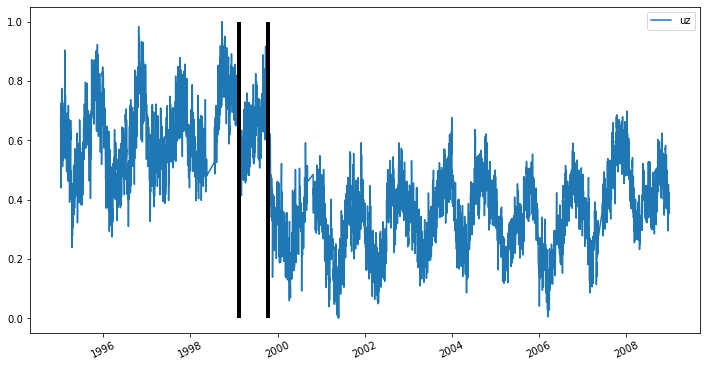

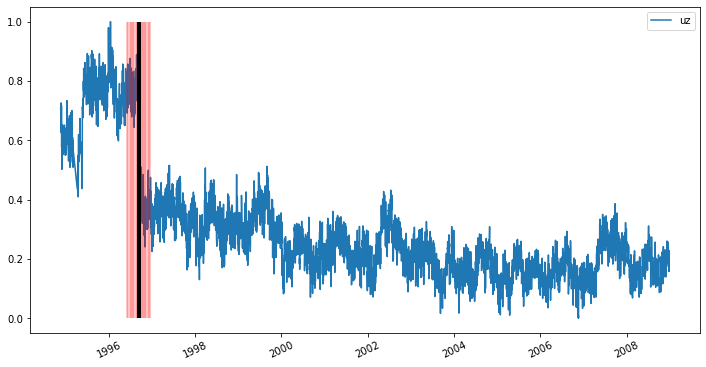

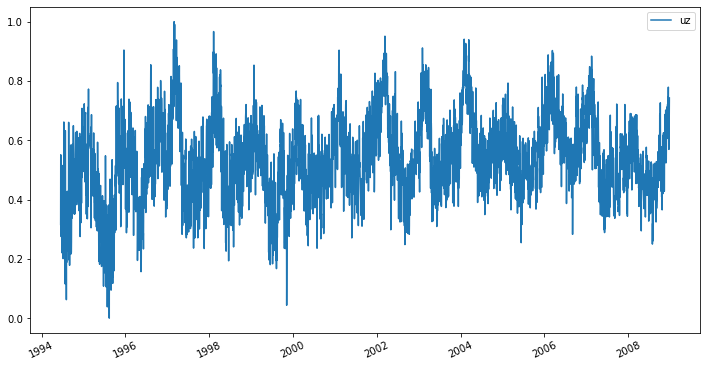

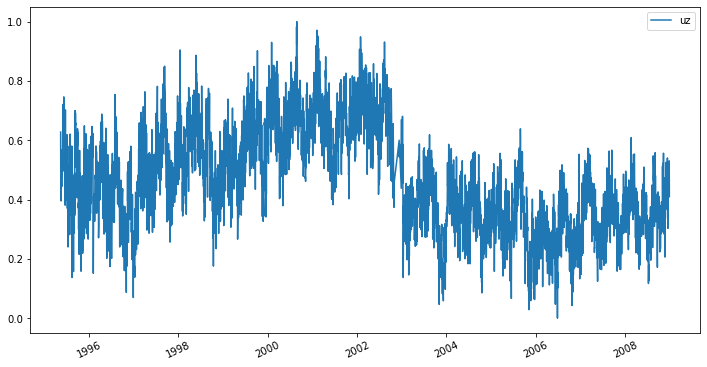

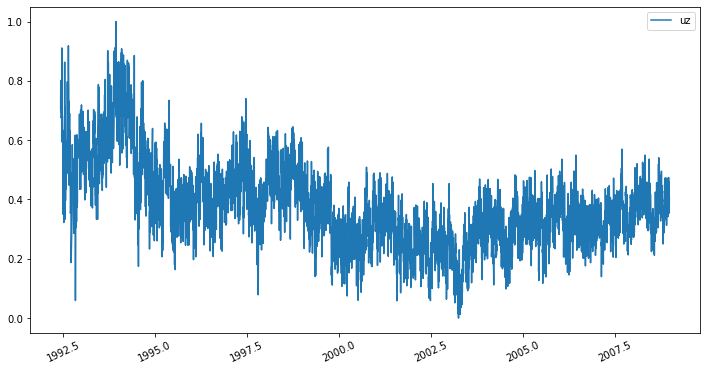

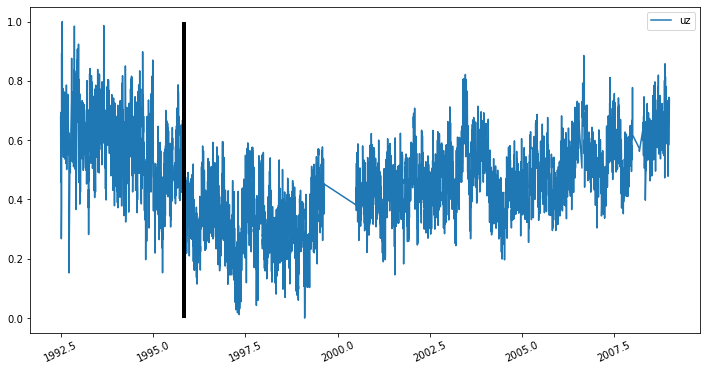

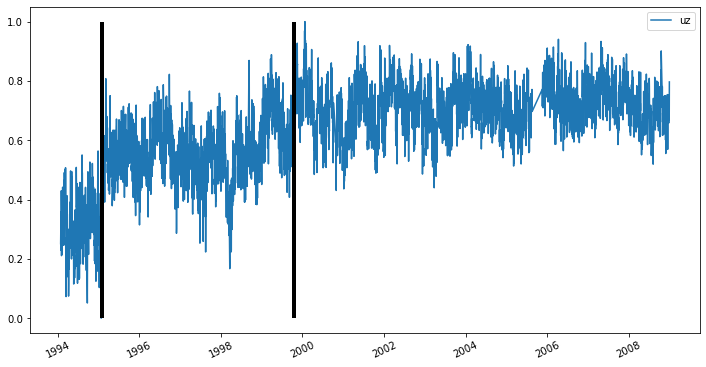

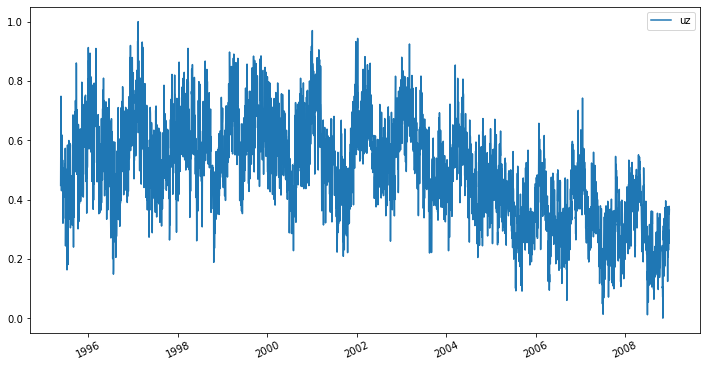

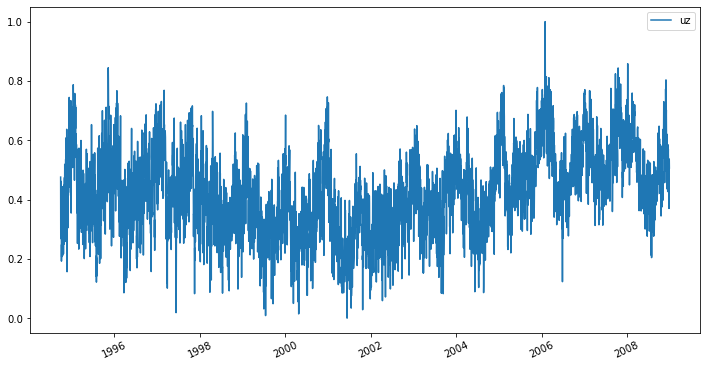

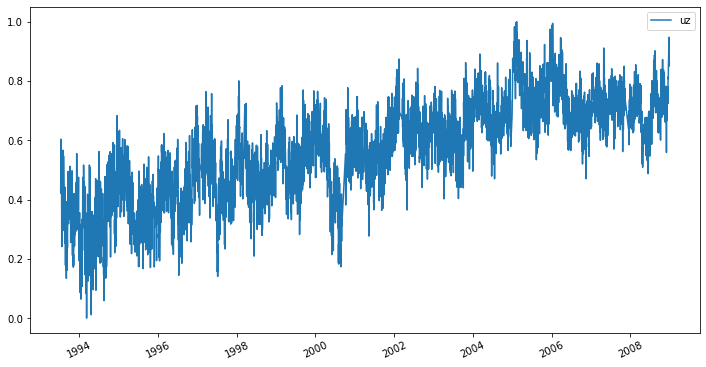

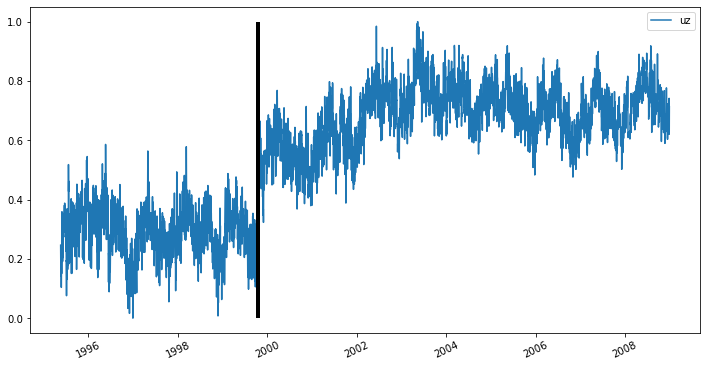

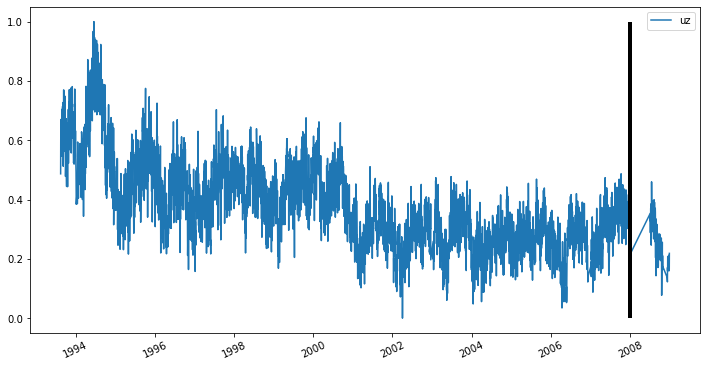

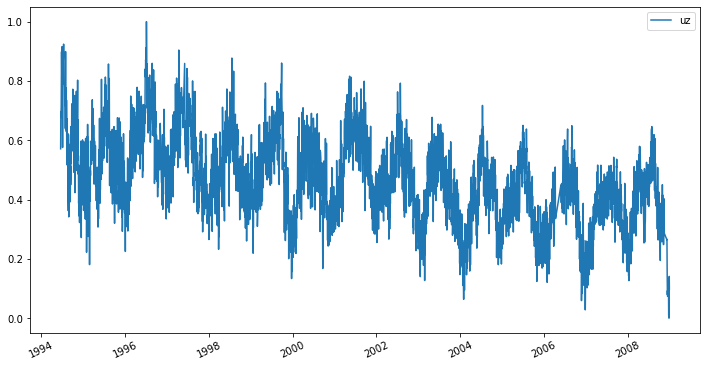

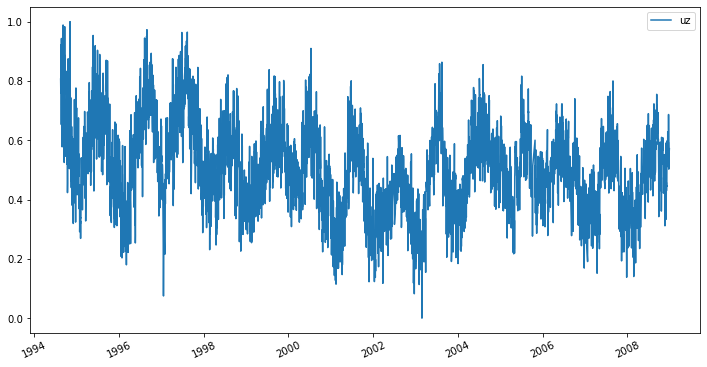

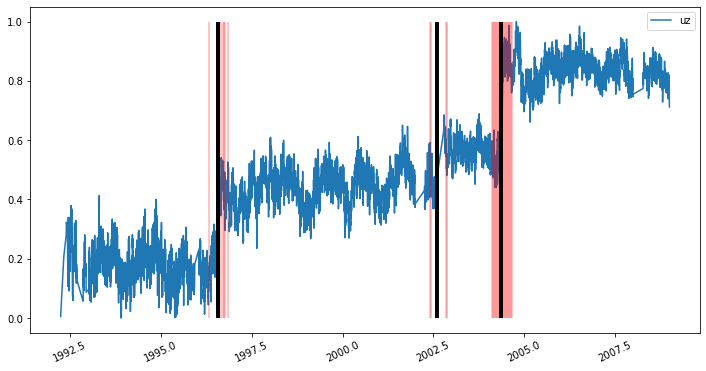

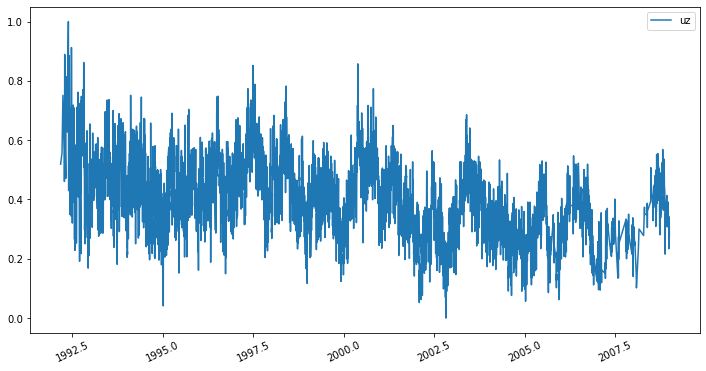

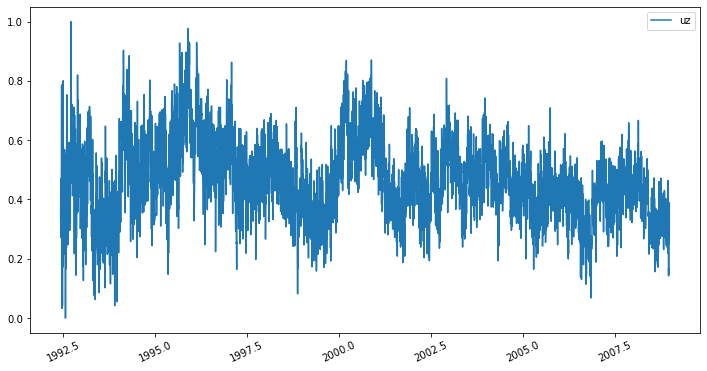

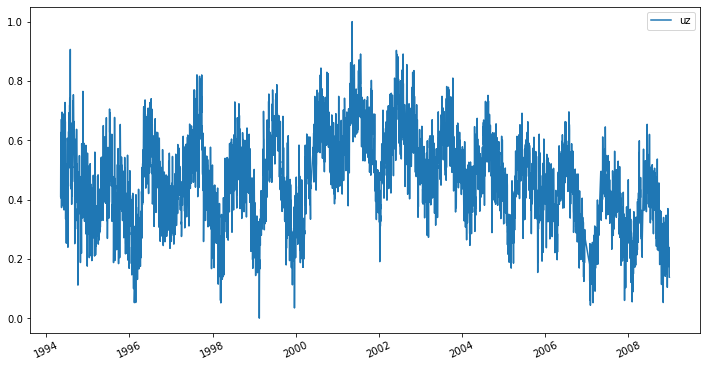

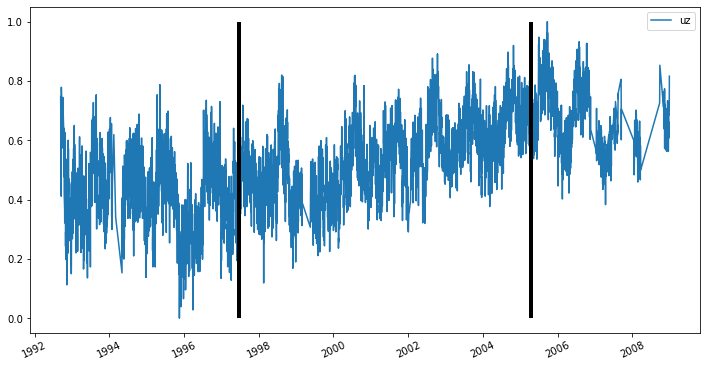

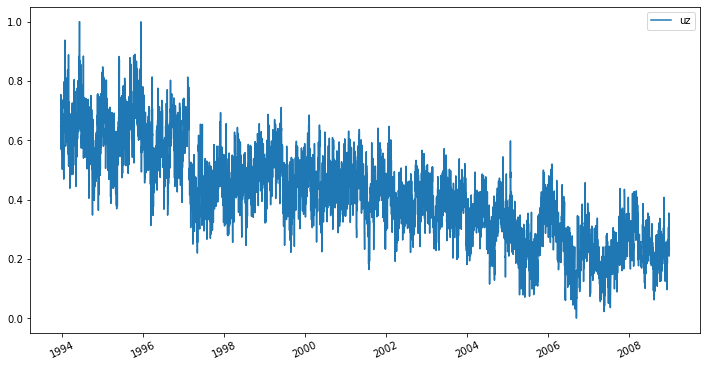

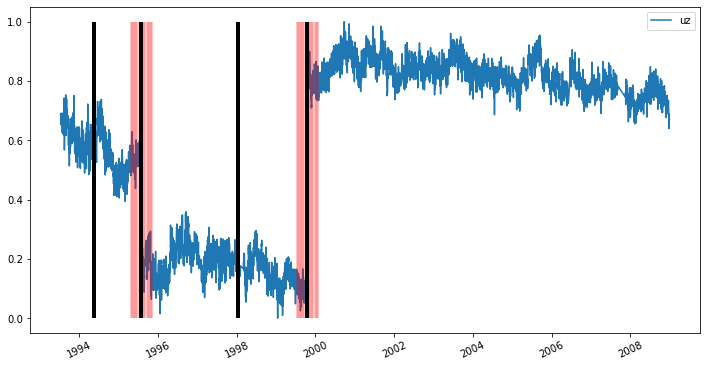

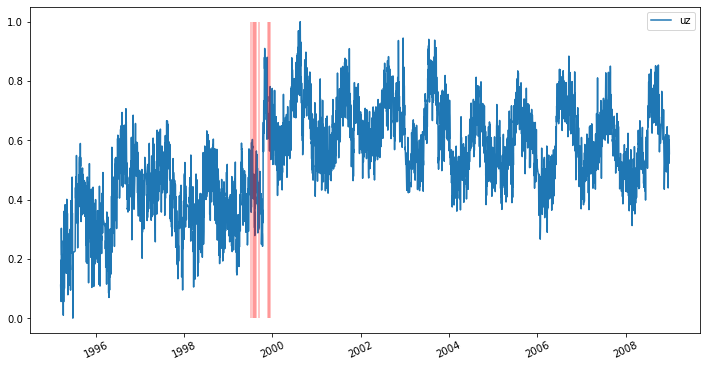

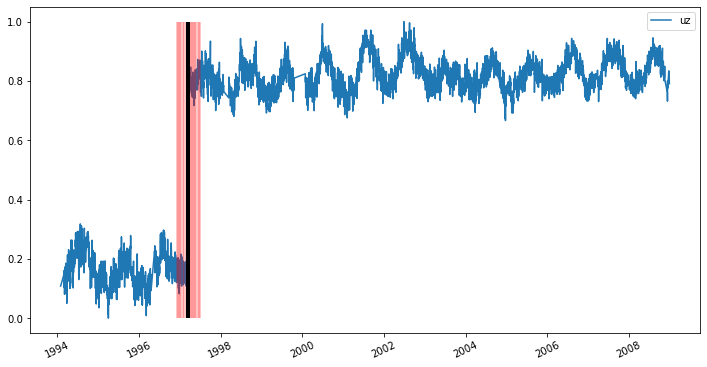

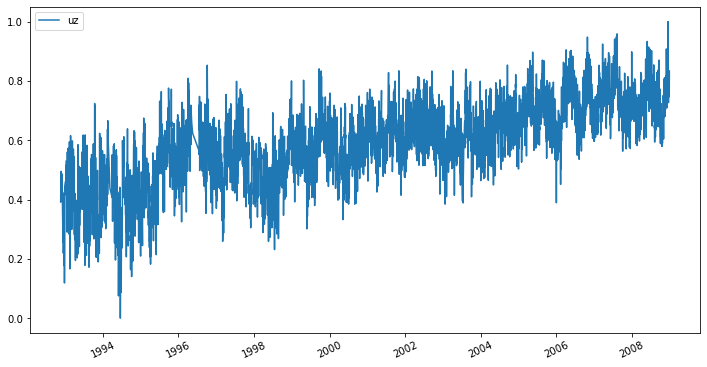

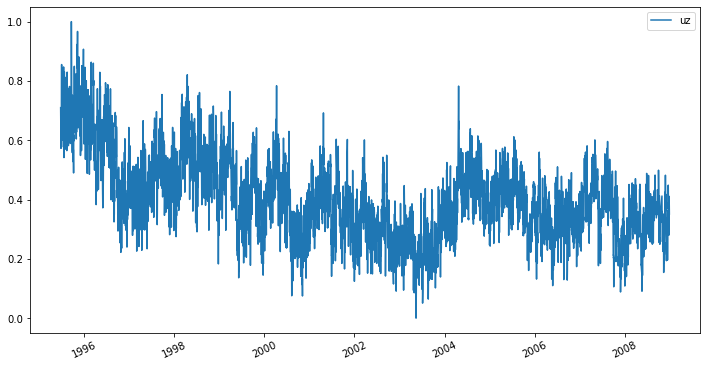

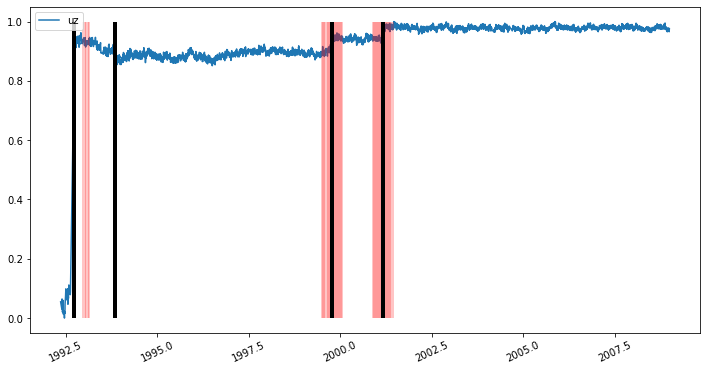

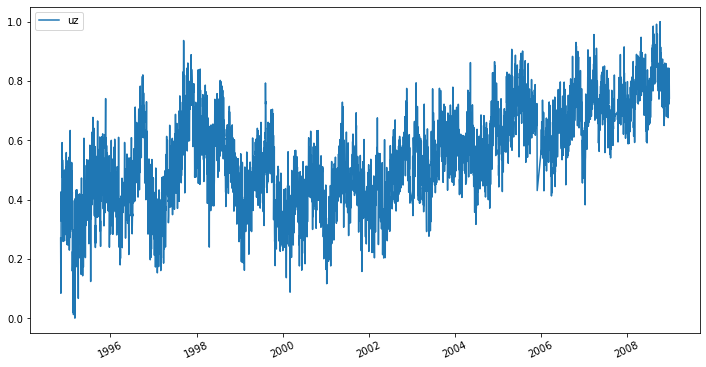

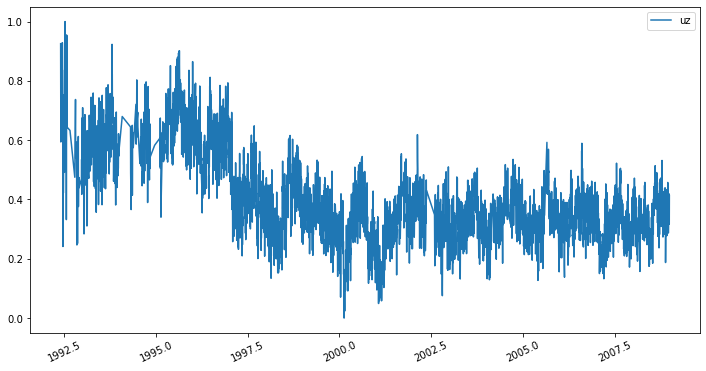

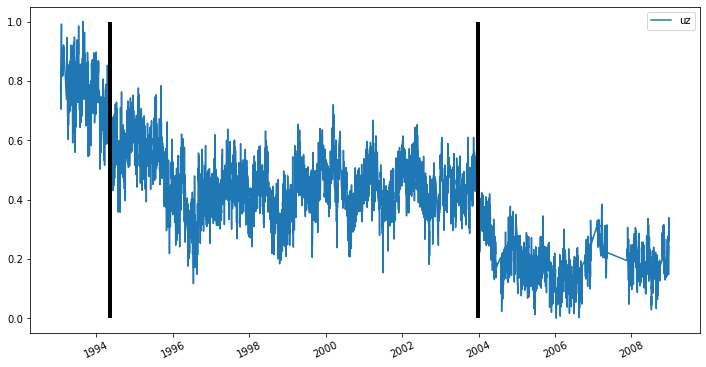

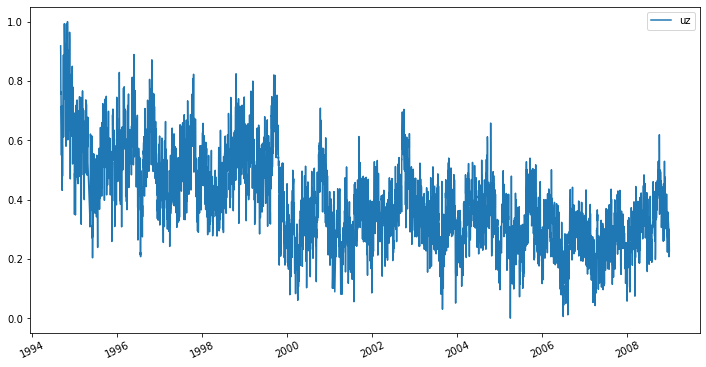

In [5]:
for csv in csv_list:
    print(csv)
    df, offset_dates = process_csv('csv/'+csv)

    window_size = 200
    interval_size = 10
    pred_dates = []   

    i = 0 
    while i < df.shape[0] - window_size:
        pred = clf.predict(np.array(df.iloc[i:i+window_size]['uz']).reshape(1,-1))

        if pred == 1:
            pred_dates.append(df.iloc[i+int(window_size/2), 0])    

        i += interval_size
    

    fig, ax = plt.subplots(figsize=(12, 6))

    np.random.seed(42)
    x = np.random.rand(150)
    plt.plot(df.set_index('date'), label='uz');
    plt.xticks(rotation=25);
    plt.legend();

    ax.vlines(pred_dates, 0, 1, colors='red', alpha=0.3)
    ax.vlines(list(offset_dates), 0, 1, colors='black', linewidth=4)
    
    plt.savefig('../uz_imgs/'+csv[0:4] + '_pred_vis.jpg')